
# Circuito simple sintonizado

## Transferencia de tensión

Del circuito simplificado de un simple sintonizado 

<img src="fig/simplesintonizado.png">

La tensión sobre el nodo de salida $v_o$ se puede expresar como:


$$v_o = - g_m \cdot v_i \frac{1}{\frac{1}{S L} + \frac{1}{R} + S C}$$


A partir de la ecuación es posible expresar la transferencia de tensión del circuito propuesto,

$$A_v = - \frac{g_m}{SC} \frac{1}{\frac{1}{S^2 C L} + \frac{1}{SCR} + 1}$$

Operando, 

$$A_v = - \frac{g_m}{C} \frac{S}{S^2 + \frac{S}{CR} + \frac{1}{C L}}$$

Donde podemos remplazar los siguiente terminos:

$$\omega_o^2 = \frac{1}{LC}$$ 

$$Q = \omega_o C R$$

$$A_v = - \frac{g_m \omega_o R}{Q} \frac{S}{S^2 + \frac{S \omega_o}{Q} + \omega_o^2}$$



In [1]:
# Libreria para el procesamiento de datos
import numpy as np

# Librerias para realizar los graficos
import matplotlib.pyplot as plt

# Libreria para realizar diagramas de polos y zeros 
import scipy.signal as signal



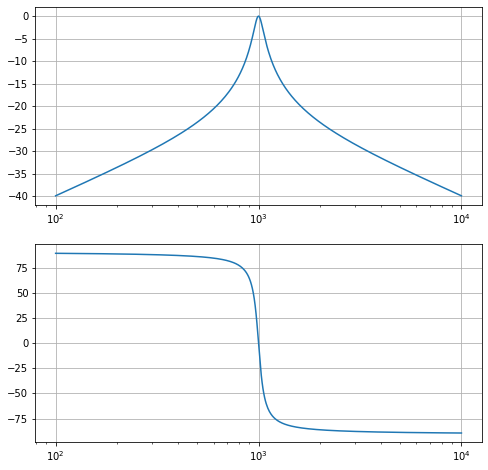

In [3]:
# Dado valores a wo y el Q del circuito
wo=1000;
Q=10;

# Transferencia en wo
gmR=1; # gmR

# Valores del denominador y numerador de la ganancia de tensión
#H($) =  $ (Gvo*wo/Q) / ($**2+$wo/Q+1) 
num=[  gmR*wo/Q, 0    ];   
den=[ 1, wo/Q  , wo**2];

# Transferencia
sys1 = signal.lti(num,den); 

# bode de la transferencia

# Defino los valores de w para graficar
w = np.linspace(wo*0.1,wo*10,1e3)  
#w, H = signal.freqresp(sys1, w)

w, mag, phase = signal.bode(sys1,w) # Diagrama de bode: frecuencias, magnitud y fase

# 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))


ax1.semilogx(w, mag) # Eje x logarítmico
ax1.grid()
#ax1.set_xlim([5e2,5e3])
#ax1.set_ylim([-25,0])
ax2.semilogx(w, phase) # Eje x logarítmico
ax2.grid()
#ax2.set_xlim([5e2,5e3])

plt.show()

## Diagrama de polos y zeros

Volviendo a la expresión

$$A_v = - \frac{g_m}{C} \frac{S}{S^2 + \frac{S}{CR} + \frac{1}{C L}}$$


La expresión puede ser rescrita como:

$$A_v = - \frac{g_m}{C} \frac{S}{(S-p_1)(S-p_2)}$$


Donde los polos: 

$$p_1 = -\frac{1}{2RC} + \sqrt[2]{\frac{1}{4R^2C^2} - \frac{1}{LC} }$$

$$p_2 = -\frac{1}{2RC} - \sqrt[2]{\frac{1}{4R^2C^2} - \frac{1}{LC} }$$


Donde podemos remplazar los siguiente terminos:

$$\omega_o^2 = \frac{1}{LC}$$ 

$$Q = \omega_o C R$$


$$p_1 = -\frac{\omega_o }{2Q} + \sqrt[2]{\frac{\omega_o^2}{4Q^2} - \omega_o^2 }$$


$$p_2 = -\frac{\omega_o }{2Q} - \sqrt[2]{\frac{\omega_o^2}{4Q^2} - \omega_o^2 }$$


Factor comun $-\omega_o^2$:


$$p_1 = -\frac{\omega_o }{2Q} + j\omega_o \sqrt[2]{ 1 -\frac{1}{4Q^2}}$$


$$p_2 = -\frac{\omega_o }{2Q} - j\omega_o \sqrt[2]{ 1 -\frac{1}{4Q^2}}$$




Si $Q > 2$, podemos aproximar los polos a:


$$p_1 = -\frac{\omega_o }{2Q} + j\omega_o$$

$$p_2 = -\frac{\omega_o }{2Q} - j\omega_o$$

Siendo entonces la ganancia de tensión:

$$A_v = - \frac{g_m}{C} \frac{S}{(S+\frac{\omega_o }{2Q} + j\omega_o)(S+\frac{\omega_o }{2Q} - j\omega_o )}$$




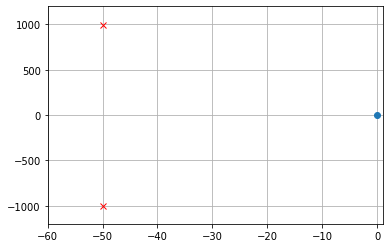

In [16]:
# Dado valores a wo y el Q del circuito
wo=1000;
Q=10;

# Transferencia en wo
gmR=1; # gmR

# Valores del denominador y numerador de la ganancia de tensión
#H($) =  $ (Gvo*wo/Q) / ($**2+$wo/Q+1) 
num=[  gmR*wo/Q, 0    ];   
den=[ 1, wo/Q  , wo**2];

# Transferencia
sys1 = signal.lti(num,den); 

plt.figure()
plt.plot(sys1.zeros.real, sys1.zeros.imag, 'o')
plt.plot(sys1.poles.real, sys1.poles.imag, 'rx')
plt.grid()
plt.xlim([-60,1])
plt.ylim([-1200,1200])
plt.show()